In [2]:
from preamble import *

In [3]:
df = pd.read_csv('./data/j_weather_data_v2.csv')
df = df.drop('snow', axis=1)
df['datetime'] = pd.to_datetime(df['datetime'])
print(type(df), df.shape)
df.head()

<class 'pandas.core.frame.DataFrame'> (15739, 8)


,datetime,temperature,precipitation,wind_speed,humidity,atmospheric_pressure,outflow,input
0,2023-01-01 00:00:00,-0.9,0.0,1.4,72.0,1023.6,4672.98,6063.02
1,2023-01-01 01:00:00,-1.3,0.0,1.5,74.0,1023.3,6425.49,7195.35
2,2023-01-01 02:00:00,-1.7,0.0,1.4,75.0,1023.1,8620.11,7472.46
3,2023-01-01 03:00:00,-2.0,0.0,1.2,77.0,1023.3,8697.04,4809.88
4,2023-01-01 04:00:00,-2.0,0.0,1.7,79.0,1022.8,9543.70,6292.50


In [4]:
df.loc[df['outflow'] <= 1, 'outflow'] = np.nan
median_value = df['outflow'].median()
df['outflow'] = df['outflow'].fillna(median_value)

In [5]:
# import holidays

# kr_holidays = holidays.KR()
# df['is_weekend'] = df['datetime'].dt.dayofweek >= 5 | df['datetime'].isin(kr_holidays)
# df.head()

In [6]:
train_size = int(df.shape[0] * 0.7)

train = df[:train_size]
test = df[train_size:]

In [7]:
# df_reset = df.reset_index(drop=True)
# feature = df.drop(columns=['outflow'])
# target = df['outflow'].values.reshape(-1, 1)
# feature.shape, target.shape

In [8]:
def create_time_feature(df): 
  df['dayofmonth'] = df['datetime'].dt.day 
  df['dayofweek'] = df['datetime'].dt.dayofweek 
  # df['quarter'] = df['datetime'].dt.quarter 
  # df['month'] = df['datetime'].dt.month 
  # df['year'] = df['datetime'].dt.year 
  df['dayofyear'] = df['datetime'].dt.dayofyear 
  # df['week'] = df['datetime'].dt.isocalendar().week
  df['hour'] = df['datetime'].dt.hour
  df['minute'] = df['datetime'].dt.minute
  df['second'] = df['datetime'].dt.second
  return df

In [9]:
# feature = create_time_feature(feature)
create_time_feature(train)
create_time_feature(test)

C:\Users\user\AppData\Local\Temp\ipykernel_8184\2973455594.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dayofmonth'] = df['datetime'].dt.day
C:\Users\user\AppData\Local\Temp\ipykernel_8184\2973455594.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dayofweek'] = df['datetime'].dt.dayofweek
C:\Users\user\AppData\Local\Temp\ipykernel_8184\2973455594.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

,datetime,temperature,precipitation,wind_speed,humidity,atmospheric_pressure,outflow,input,dayofmonth,dayofweek,dayofyear,hour,minute,second
11017,2024-04-04 01:00:00,13.9,0.0,0.8,97.0,1002.8,4283.86,4206.50,4,3,95,1,0,0
11018,2024-04-04 02:00:00,13.6,0.0,1.2,97.0,1002.3,4849.14,3932.14,4,3,95,2,0,0
11019,2024-04-04 03:00:00,13.4,0.0,1.1,99.0,1003.0,4841.52,3868.99,4,3,95,3,0,0
11020,2024-04-04 04:00:00,13.7,0.0,0.7,98.0,1003.7,4789.53,6099.34,4,3,95,4,0,0
11021,2024-04-04 05:00:00,13.5,0.0,1.2,97.0,1004.2,9692.75,7630.46,4,3,95,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15734,2024-10-17 14:00:00,25.7,0.0,0.9,52.0,1013.3,11705.70,7130.56,17,3,291,14,0,0
15735,2024-10-17 15:00:00,26.0,0.0,0.2,47.0,1013.0,9027.35,6876.49,17,3,291,15,0,0
15736,2024-10-17 16:00:00,26.1,0.0,0.3,49.0,1012.8,8719.41,7014.71,17,3,291,16,0,0
15737,2024-10-17 17:00:00,25.3,0.0,0.2,51.0,1012.9,2606.70,2500.51,17,3,291,17,0,0


In [10]:
# feature = feature.drop('datetime', axis=1)
# feature.head()
train = train.drop('datetime', axis=1)
test = test.drop('datetime', axis=1)
train.head(), test.head()

(   temperature  precipitation  wind_speed  humidity  atmospheric_pressure  \
 0         -0.9            0.0         1.4      72.0                1023.6   
 1         -1.3            0.0         1.5      74.0                1023.3   
 2         -1.7            0.0         1.4      75.0                1023.1   
 3         -2.0            0.0         1.2      77.0                1023.3   
 4         -2.0            0.0         1.7      79.0                1022.8   
 
    outflow    input  dayofmonth  dayofweek  dayofyear  hour  minute  second  
 0  4672.98  6063.02           1          6          1     0       0       0  
 1  6425.49  7195.35           1          6          1     1       0       0  
 2  8620.11  7472.46           1          6          1     2       0       0  
 3  8697.04  4809.88           1          6          1     3       0       0  
 4  9543.70  6292.50           1          6          1     4       0       0  ,
        temperature  precipitation  wind_speed  humidit

In [11]:
# X_train = feature[:train_size]
# y_train = target[:train_size]
# X_test = feature[train_size:]
# y_test = target[train_size:]
# print(X_train.shape, X_test.shape)

X_train = train.drop('outflow', axis=1)
y_train = train['outflow']
X_test = test.drop('outflow', axis=1)
y_test = test['outflow']
print(X_train.shape, X_test.shape)

(11017, 12) (4722, 12)


In [12]:
# from sklearn.preprocessing import MinMaxScaler

# scaler_feature = MinMaxScaler()
# train_feature_scaled = scaler_feature.fit_transform(trainset_feature)
# test_feature_scaled = scaler_feature.transform(testset_feature)

# scaler_target = MinMaxScaler()
# train_target_scaled = scaler_target.fit_transform(trainset_target)
# test_target_scaled = scaler_target.transform(testset_target)

In [13]:
# from tqdm import tqdm

# def split_dataset(data, target, seq_len):
#   X, y  = [], []
#   for i in tqdm(range(data.shape[0]-(seq_len))):
#     X.append(data[i:i+seq_len, :]) 
#     y.append(target[i+seq_len])
#   return np.array(X), np.array(y)

# seq_len = 60

In [14]:
# X_train, y_train = split_dataset(trainset_feature, trainset_target, seq_len)
# X_test, y_test = split_dataset(testset_feature, testset_target, seq_len)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((11017, 12), (11017,), (4722, 12), (4722,))

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

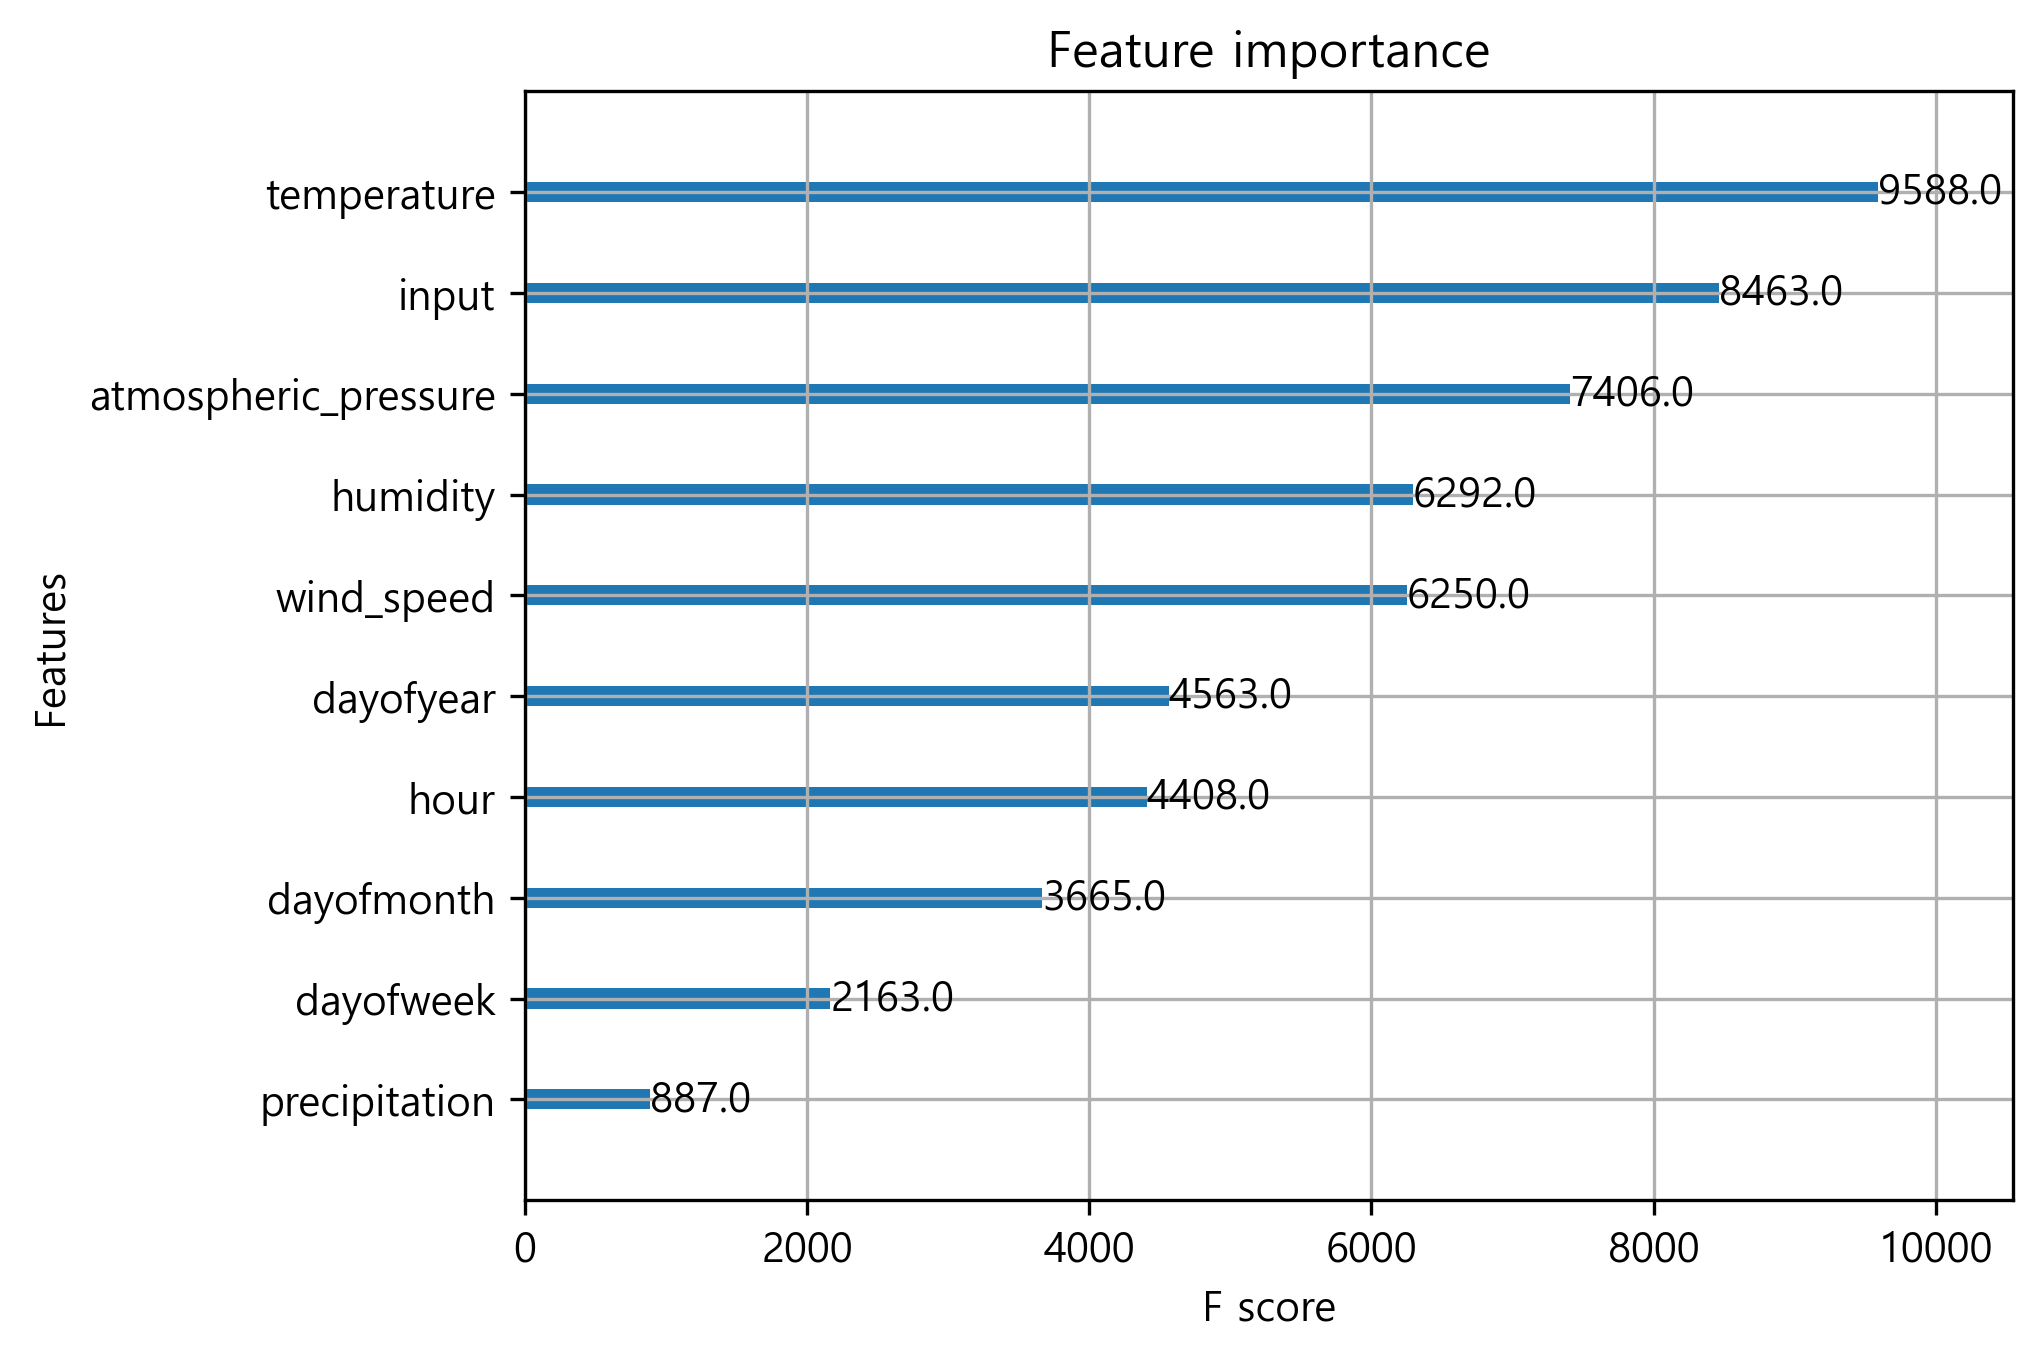

In [15]:
import xgboost as xgb 
reg = xgb.XGBRegressor(n_estimators=1000) 
reg.fit(X_train, y_train, verbose = False)

xgb.plot_importance(reg)

# test['meantemp_Prediction'] = reg.predict(X_test) 
# train['meantemp'].plot(style='k', figsize=(10,5), label = 'train') 
# test['meantemp'].plot(style='b', figsize=(10,5), label = 'test') 
# test['meantemp_Prediction'].plot(style='r', figsize=(10,5), label = 'prediction') 
# plt.title('Mean Temperature Dehli Data') 
# plt.legend()

# from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error 
# print('RMSE: ', round(mean_squared_error(y_true=test['meantemp'],y_pred=test['meantemp_Prediction']),3)) 
# print('MAE: ', round(mean_absolute_error(y_true=test['meantemp'],y_pred=test['meantemp_Prediction']),3)) 
# print('MAPE: ', round(mean_absolute_percentage_error(y_true=test['meantemp'],y_pred=test['meantemp_Prediction']),3))

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'MSE : {mse}, RMSE_ORI : {rmse} R-value : {r2}')

MSE : 4969414.30970863, RMSE_ORI : 2229.2183180901393 R-value : 0.2061407762482057


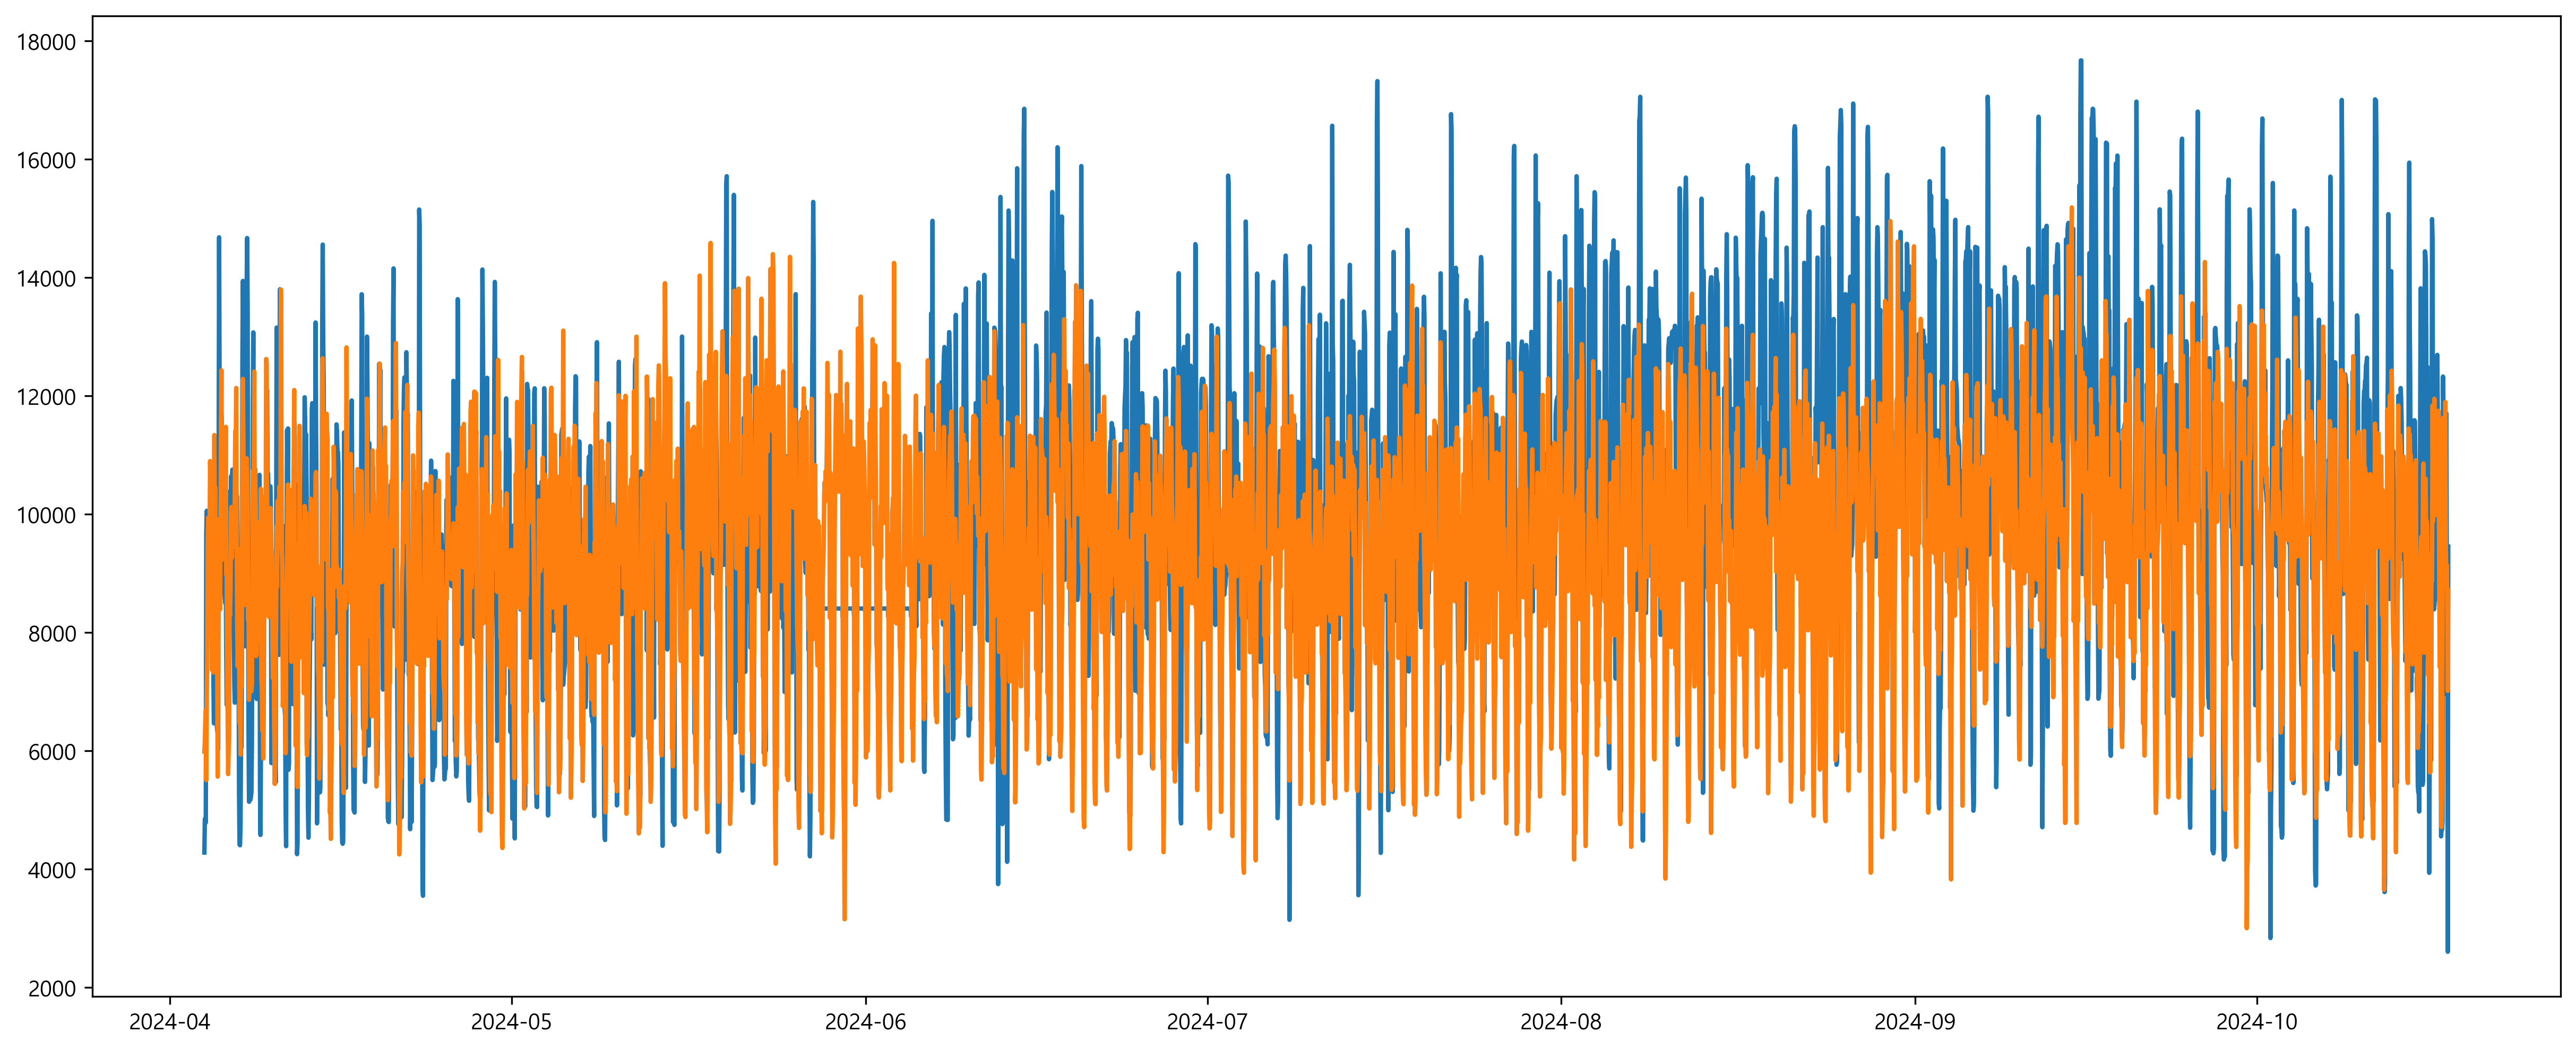

In [17]:
plt.figure(figsize=(20, 8))
plt.plot(df['datetime'][train_size:], y_test)
plt.plot(df['datetime'][train_size:], y_pred)
plt.show()

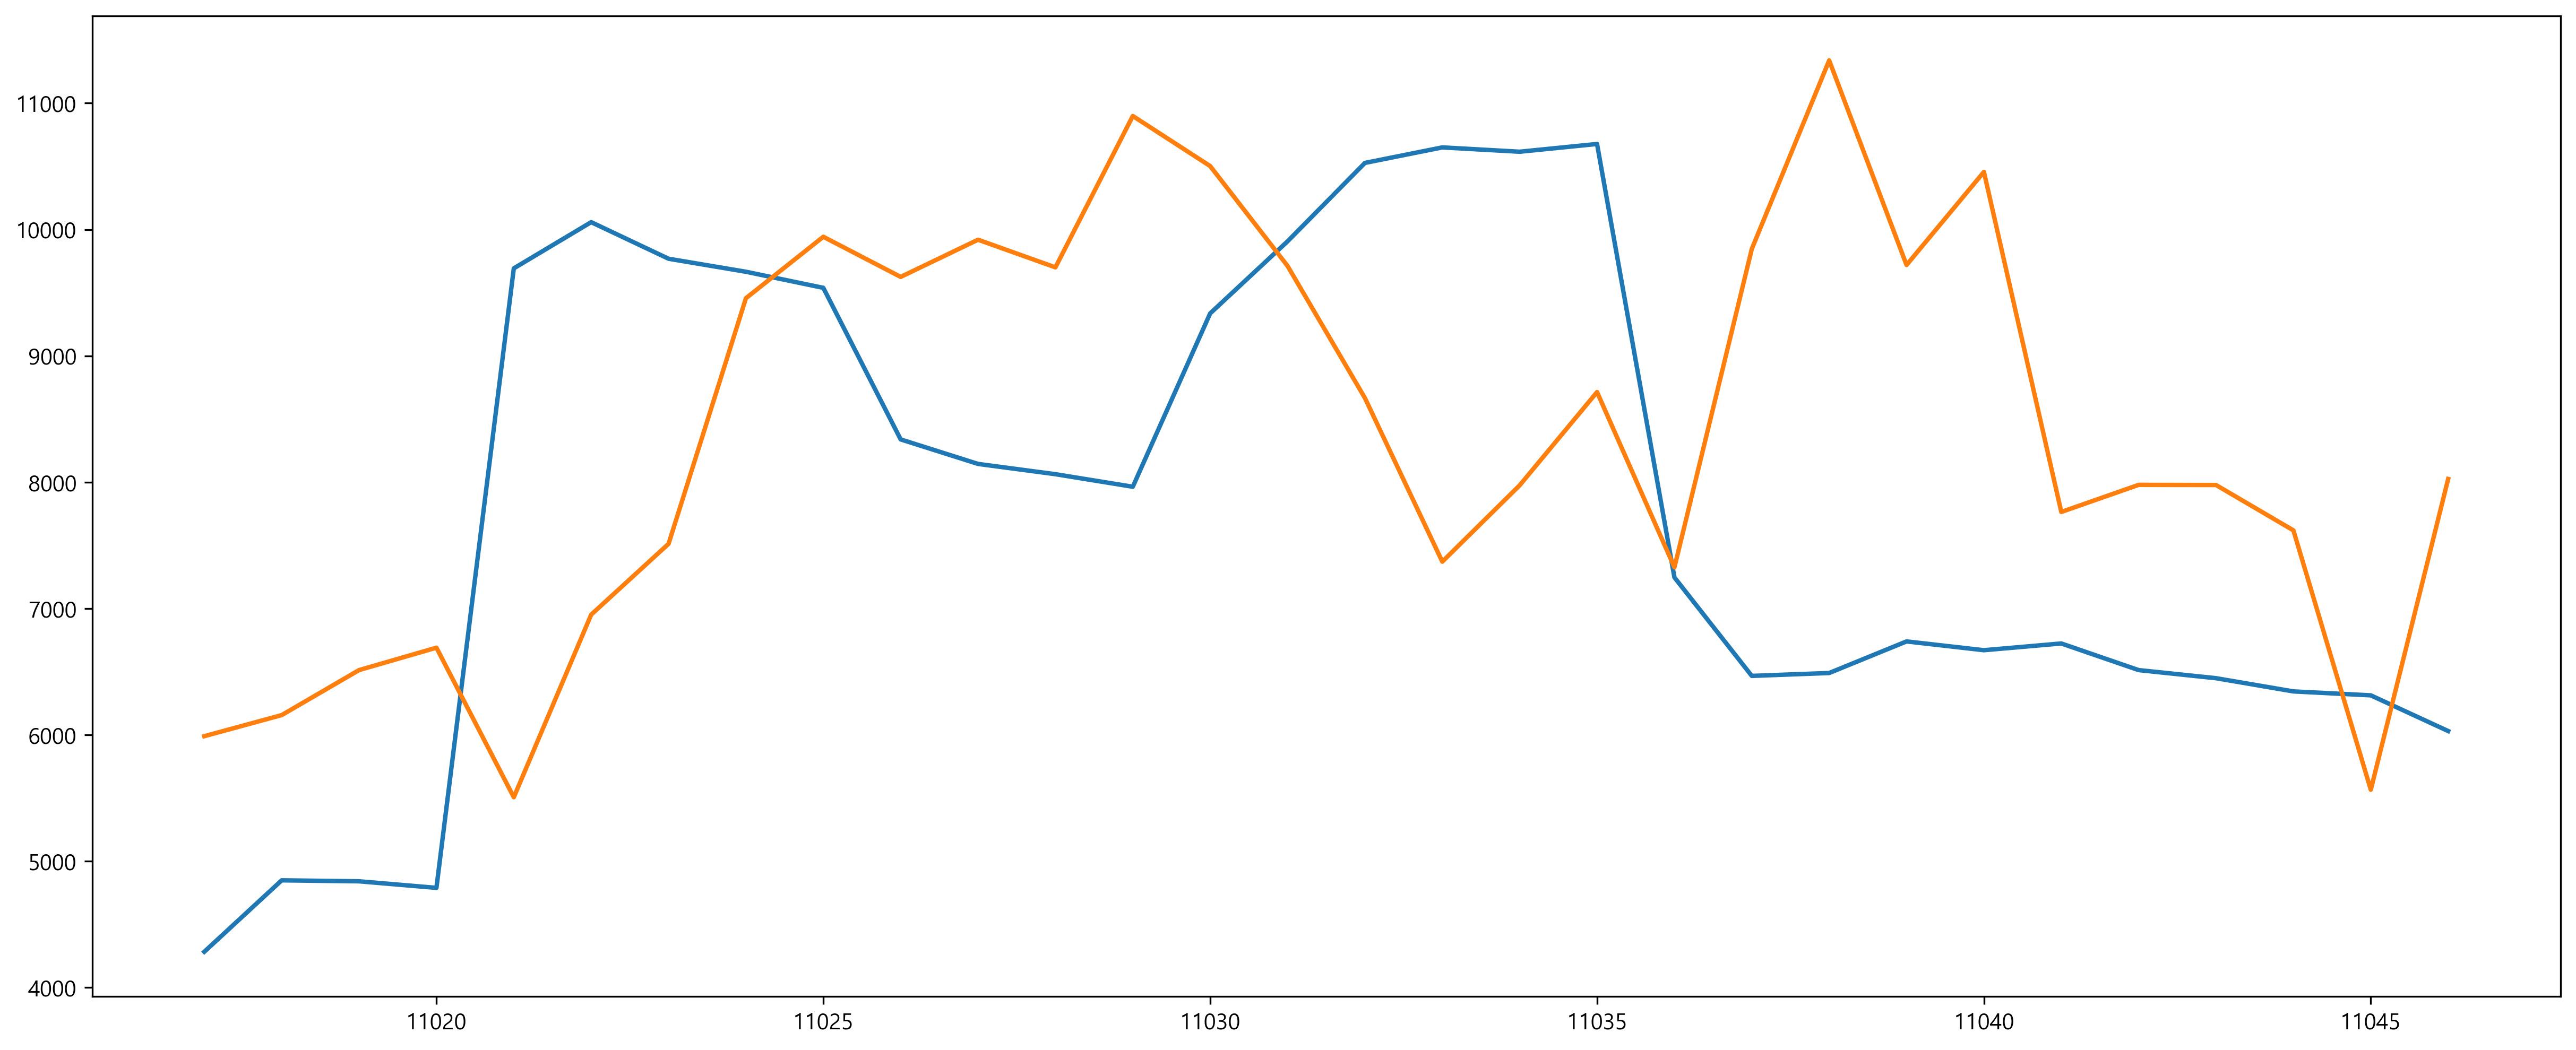

In [19]:
plt.figure(figsize=(20, 8))
plt.plot(df.index[train_size :train_size + 30], y_test[:30])
plt.plot(df.index[train_size :train_size + 30], y_pred[:30])
plt.show()